Goals:
- What makes a globular cluster accreted?
- What do globular clusters tell us about the formation of the Milky Way?
- How do we know if they are formed within the Milky Way?
- What other possible formation scenarios could their be and how do we identify them?

Current Goal:
- Defining which globular clusters from our data sets are accreted

Notes:
- Have access to Fe/H value and estimated age of some galaxy candidates
- We can hopefully plot these values against each other and use "In-situ vs. accretted Milky Way..." paper to compare results with and determine which ones are accretted

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io as ap

In [3]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
#print(Harris_i)

Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
#print(Harris_ii)

Harris_iii = pd.read_csv('Data_FOlder/HarrisPartIII.csv')
print(Harris_iii)

Krause21 = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age', 'FeH']) #usecols specifies specific columns
#print(Krause21)

VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age', 'FeH']) #usecols specifies specific columns
#print(VandenBerg)


            ID    v_r  v_r_e  v_LSR  sig_v  sig_v_e     c   r_c   r_h   mu_V  \
0      NGC 104  -18.0    0.1  -26.7   11.0      0.3  2.07  0.36  3.17  14.38   
1      NGC 288  -45.4    0.2  -51.9    2.9      0.3  0.99  1.35  2.23  20.05   
2      NGC 362  223.5    0.5  214.0    6.4      0.3  1.76  0.18  0.82  14.80   
3    Whiting 1 -130.6    1.8 -138.1    NaN      NaN  0.55  0.25  0.22    NaN   
4     NGC 1261   68.2    4.6   54.9    NaN      NaN  1.16  0.35  0.68  17.73   
..         ...    ...    ...    ...    ...      ...   ...   ...   ...    ...   
152   NGC 7089   -5.3    2.0    3.8    8.2      0.6  1.59  0.32  1.06  15.78   
153   NGC 7099 -184.2    0.2 -179.6    5.5      0.4  2.50  0.06  1.03  15.35   
154     Pal 12   27.8    1.5   32.5    NaN      NaN  2.98  0.02  1.72  19.21   
155     Pal 13   25.2    0.3   30.9    0.9      0.3  0.66  0.48  0.36  24.31   
156   NGC 7492 -177.5    0.6 -176.2    1.2      1.0  0.72  0.86  1.15  20.68   

     rho_0  lg_tc  lg_th  
0     4.88  

In [4]:
#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])

#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])

In [ ]:



#Adding mask
#mask1 = Krause21y > y
#mask2 = VandenBergy > y


In [1]:
#plt.scatter(Krause21x, Krause21y[mask1], color='red', label='Krause Data', s=20)
#plt.scatter(Krause21x, Krause21y[~mask1], color='blue', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy[mask1], color='red', label='vandenBerg Data', s=20)
plt.scatter(VandenBergx, VandenBergy[~mask1], color='blue', label='vandenBerg Data', s=20)
plt.plot(x, y, color='green')

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

NameError: name 'plt' is not defined

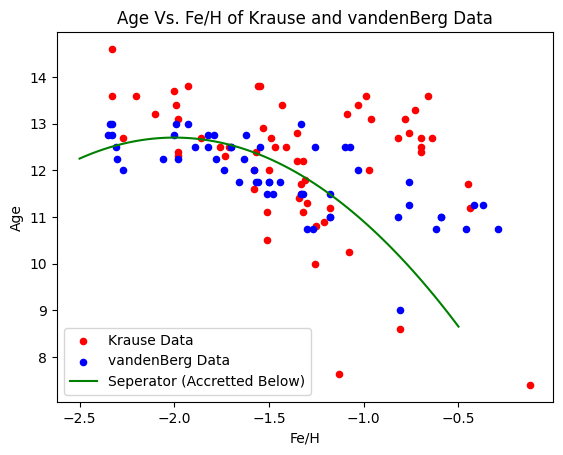

In [ ]:
#Gives singular plots
#vandenBerg.plot.scatter(x="FeH", y="Age")
#Krause.plot.scatter(x="FeH", y="Age")

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

#adding mask
mask = y < Accretted_Line

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

TypeError: '<' not supported between instances of 'float' and 'Line2D'

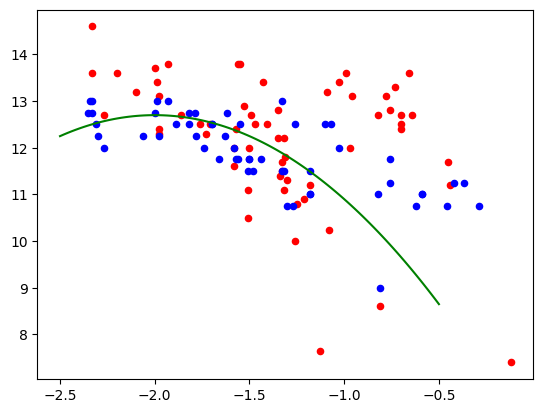

In [57]:
#Gives singular plots
#vandenBerg.plot.scatter(x="FeH", y="Age")
#Krause.plot.scatter(x="FeH", y="Age")

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

#adding mask
mask1 = Krause21y < Accretted_Line

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()